# Titanic : Machine Learning from Disaster

## Predict survival on the Titanic

- Defining the problem statement

- Collecting the data

- Expoloratory data analysis

- Feature engineering

- Modelling

- Testing

# 1. Defining the problem statement

Complete the analysis of what sort of people were likely to survice.

In paricular, we ask you to apply the tools of machine learning to predict which passsengers survived the tragedy.

타이타닉 승선객 중 어떤 승객이 살아남고 죽었는지 판단하는 것이 goal!



# 2. Collecting the data

## load train, test dataset using Pandas

In [0]:
import pandas as pd

train = pd.read_csv('https://github.com/Crpediem/deeprunning-study/raw/master/Machine%20Learning/train.csv')
test = pd.read_csv('https://github.com/Crpediem/deeprunning-study/raw/master/Machine%20Learning/test.csv')

# 3. Exploratory data analysis

Printing first 5 rows of the train dataset.

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Dictionary

- Survived : 0 = No, 1= Yes
- pclass : Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd
- sibsp : # of siblings / spouses aboard the Titanic
- parch : # of parents / children aboard the Titanic
- ticket : Ticket number
- Carbin : Carbin number
- embarked : port of Embarkation C = Cherboung, Q = Queenstown, S = Southampton

##### Total rows and columns

We can see that there are 891 rows and 12 columns in our training dataset.

In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We can see that Age value is missing for many rows.

Out of 891 rows, the Age value is present only in 714 rows.

Similary, Cabin values are also missing in many rows. Only 204 out of 891 rows hav Cabin values.


Cabin과 Age라는 데이터가 다 제공되지 않음을 보실 수 있습니다.

In [9]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are 177 rows with missing Are, 687 rows with missing Cabin and 2 rows with missing Embarked information.

isnull이란 함수는 해당 데이터에서 빈값이 얼마나 있는지 알려줍니다.

## import python lib for visualization

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()  # setting seaborn default for plots

## Bar Chart for Categorical Features

- Pclass
- Sex
- SibSp (# of sibllings and spouse)
- Parch (# of parents and children)
- Embarked
- Cabin

In [0]:
def bar_chart(feature):
  survived = train[train['Survived']==1][feature].value_counts()
  dead = train[train['Survived']==0][feature].value_counts()
  df = pd.DataFrame([survived, dead])
  df.index = ['Survuved','Dead']
  df.plot(kind='bar', stacked=True, figsize=(10,5))

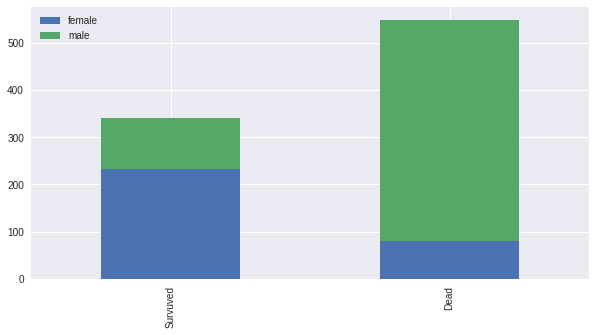

In [13]:
bar_chart('Sex')

The Chart confirms **Women** more likely survivied than **Men**

이 차트를 통해서 여자들이 남자들보다 살아남을 확률이 높아다는 것을 보실 수 있습니다.

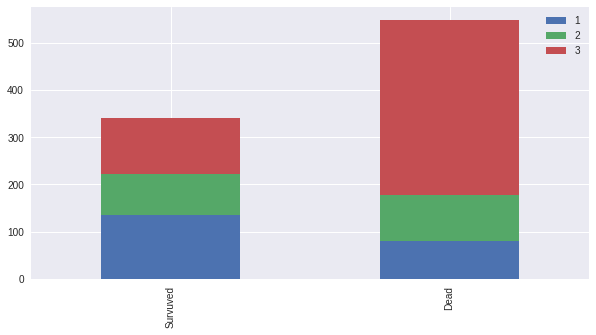

In [14]:
bar_chart('Pclass')

The Chart confirms **1st class** more likely survivied than **other classes**

The Chart confirms **3rd class** more likely dead than **other classes**

1st class의 사람들은 다른 class에 비해 많이 살아 남았고
3rd class의 사람들은 다른 class에 비해 많이 죽었습니다.

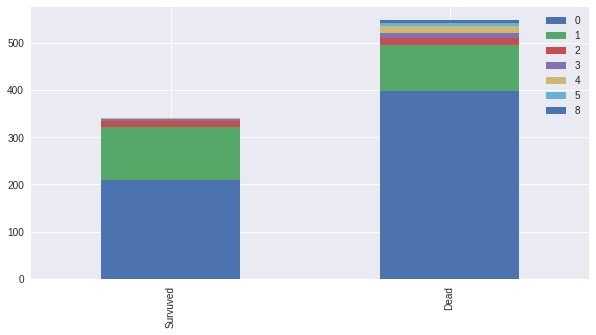

In [15]:
bar_chart('SibSp')

The Chart confirms **a person aboarded with more than 2 sibllings or spouse** more likely survived

The Chart confirms **a person aboarded without sibllings or spouse** more likely dead

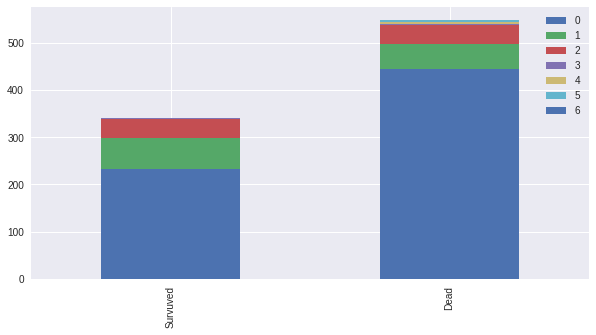

In [16]:
bar_chart('Parch')

The Chart confirms **a person aboarded with more than 2 parents or children** more likely survived

The Chart confirms **a person aboarded alone more** likely dead

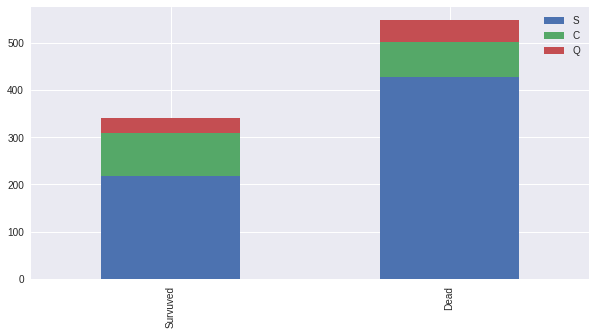

In [17]:
bar_chart('Embarked')

The Chart confirms **a person aboarded from C** slightly more likely survived

The Chart confirms **a person aboarded from Q** more likely dead

The Chart confirms **a person aboarded from S** more likely dead